In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [3]:
from imblearn.over_sampling import RandomOverSampler
X = Data['Lemma']
y = Data['Manual Label']
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X.values.reshape(-1, 1), y)
oversampled_data = pd.DataFrame({'text': X_resampled.ravel(), 'manual_label': y_resampled})

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.ravel())
X_val_vec = vectorizer.transform(X_val.ravel())

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [7]:
rf = RandomForestClassifier(n_estimators=700,min_samples_split= 2, random_state=42)
svm = SVC(kernel='poly', C=10, gamma='scale', random_state=42)
gb = GradientBoostingClassifier(learning_rate= 1, max_depth= 5, n_estimators= 700)

In [8]:
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([('rf', rf), ('svm', svm),('gb', gb)], voting='hard')
ensemble.fit(X_train_vec, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=700,
                                                     random_state=42)),
                             ('svm', SVC(C=10, kernel='poly', random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=5,
                                                         n_estimators=700))])

In [9]:
from sklearn.metrics import classification_report
ensemble_preds = ensemble.predict(X_val_vec)
print(classification_report(y_val, ensemble_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       472
           1       0.99      0.96      0.98       508

    accuracy                           0.98       980
   macro avg       0.98      0.98      0.98       980
weighted avg       0.98      0.98      0.98       980



In [10]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [11]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [12]:
y_true=Data2['clusters']

In [13]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.31      0.06      0.10       880
           1       0.87      0.98      0.92      5765

    accuracy                           0.86      6645
   macro avg       0.59      0.52      0.51      6645
weighted avg       0.80      0.86      0.81      6645



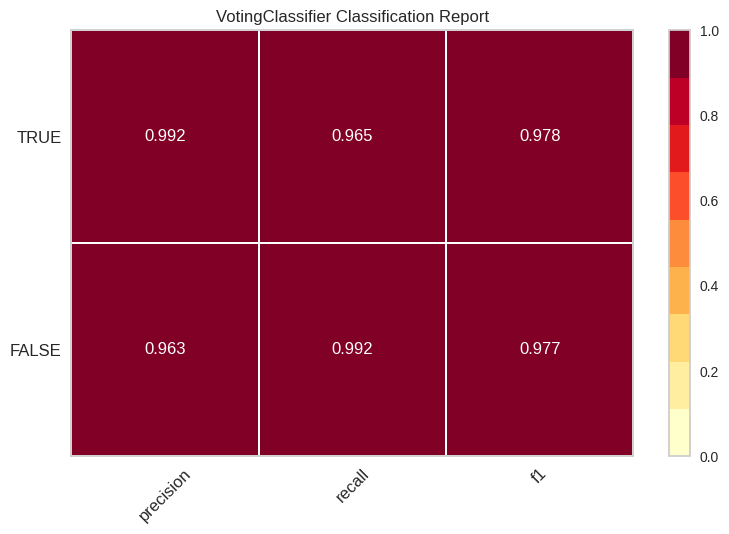

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [14]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_vec, y_train)
visualizer.score(X_val_vec, y_val)
visualizer.show()

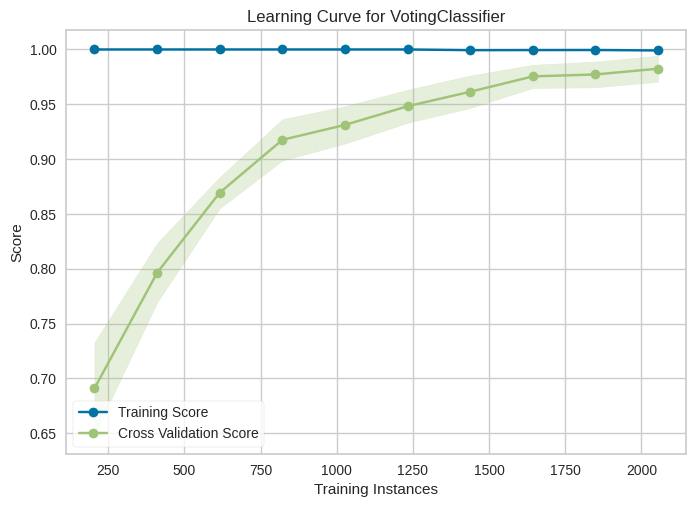

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [15]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_vec, y_train)
lc_viz.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_params = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10]}

svm_params = {'C': [1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

gb_params = {'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1, 1],
             'max_depth': [3, 5, 10]}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5)

In [ ]:
rf_grid.fit(X_train_vec, y_train)
svm_grid.fit(X_train_vec, y_train)
gb_grid.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print("Random forest best params:", rf_grid.best_params_)
print("SVM best params:", svm_grid.best_params_)
print("Gradient boosting best params:", gb_grid.best_params_)

Random forest best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Gradient boosting best params: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 300}
